# Titanic: Machine Learning from Disaster
---
### 데이터분석과 머신러닝 알고리즘으로 타이타닉 해상사고의 생존자를 예측하기
---

<span style="color:blue">RMS 타이타닉 호</span>의 침몰은 역사상 가장 슬픈 해상사고 중 하나입니다

<span style="color:blue">위키피디아에 기록된 내용</span>에 따르면 RMS 타이타닉 호는 선내에 체육관과 수영장을 포함한 호화로운 부대시설을 갖추고 있었으나, 느슨한 규제때문에 구명 보트는 단 20척 밖에 보유하고 있지 않았다고 합니다. (이 구명 보트의 정원은 고작 1,178명 이었습니다) 구명보트에 타지 못한 승객들은 바다에 뛰어들었고 이 승객들은 수 분 내에 저체온증으로 사망하였으며, 구명 보트를 타고 있다가 몇 시간 뒤에 RMS 카르파티아에 의해 구조된 사람은 고작 706명 뿐 이었습니다. 사망인원은 1500 명 이상이었습니다

이번 수업에서는 **캐글의 <span style="color:blue">Titanic: Machine Learning from Disaster</span> 경진대회에 도전합니다.** 타이타닉 해상사고 당시의 기록을 담아둔 <span style="color:blue">Encyclopedia Titanica</span>의 데이터를 참고하여, 유사한 해상 사고가 발생했을 시 어떤 승객이 생존하며, 또한 어떤 승객이 사망하는지를 예측하는 예측 모델을 만들 것입니다. 이 과정에서 프로그래밍 언어 파이썬<span style="color:blue">(Python)</span>, 파이썬의 데이터 분석 패키지 판다스<span style="color:blue">(Pandas)</span>, 그리고 파이썬의 머신러닝&인공지능 라이브러리인 싸이킷런<span style="color:blue">(scikit-learn)</span>에 대해 배워볼 것입니다.

---
### 컬럼 설명
---

(데이터는 <u><span style="color:blue">[다음의 링크](https://www.kaggle.com/c/titanic/data)</span></u>에서 다운받으실 수 있습니다)

* Survival - 생존 여부. 0이면 사망, 1이면 생존한 것으로 간주합니다.
* Pclass - 티켓 등급. 1등석(1), 2등석(2), 3등석(3)이 있으며, 1등석일수록 좋고 3등석일수록 좋지 않습니다.
* Sex - 성별. 남자(male)와 여자(female)이 있습니다.
* Age - 나이입니다. 틈틈히 빈 값이 존재하며, 소수점 값도 존재합니다.
* SibSp - 해당 승객과 같이 탑승한 형재/자매(siblings)와 배우자(spouses)의 총 인원 수입니다.
* Parch - 해당 승객과 같이 탑승한 부모(parents)와 자식(children)의 총 인원 수입니다.
* Ticket - 티켓 번호입니다. 다양한 텍스트(문자열)로 구성되어 있습니다.
* Fare - 운임 요금입니다. 소수점으로 구성되어 있습니다.
* Cabin - 객실 번호입니다. 많은 빈 값이 존재하며, 다양한 텍스트(문자열)로 구성되어 있습니다.
* Embarked - 선착장입니다. C는 셰르부르(Cherbourg)라는 프랑스 지역, Q는 퀸스타운(Queenstown)이라는 영국 * * 지역, S는 사우스햄튼(Southampton)이라는 영국 지역입니다.
---
### 작업 순서
    I.   Load Dataset
    II.  Explore
    III. Pre Processing
    IV.  Model Generator
    V.   Accuracy Measure
    VI.  Inference Test Predict
    VII. Submit
---
### I. Load Dataset
---

모든 데이터 분석의 시작은 주어진 데이터를 읽어오는 것입니다. <span style="color:blue">판다스(Pandas)</span>에는 <span style="color:blue">read_csv</span>라는 기능이 있는데, 이 기능을 통해 편리하게 데이터를 읽어올 수 있습니다. read_csv를 활용해 <span style="color:blue">Titanic: Machine Learning from Disaster</span> 경진대회에서 제공하는 두 개의 데이터(train, test)를 읽어오겠습니다. <u><span style="color:blue">[(다운로드 링크)](https://www.kaggle.com/c/titanic/data)</span></u>

여기서 파일의 경로를 지정하는 방법에 주의하셔야 합니다. 파일 경로 지정은 컴퓨터의 설정마다 천차만별로 다르기 때문에 사전에 컴퓨터의 경로 지정 개념을 숙지해두셔야 합니다. 만일 read_csv를 실행할 때 **(FileNotFoundError)** 라는 이름의 에러가 난다면 경로가 제대로 지정이 되지 않은 것입니다. 만일 **파일의 경로를 지정하는 법이 생각나지 않는다면 <u><span style="color:blue">[다음의 링크](https://88240.tistory.com/122)</span></u>를 통해 경로를 지정하는 법을 복습한 뒤 다시 시도해주세요.**

In [1]:
import pandas as pd

train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 검증 Data
---
1. Validation Data <br>
2. Test Data <br>
3. Inference Data <br>

In [2]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
train.shape   
test.shape   

(418, 11)

In [4]:
train.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
test.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


### II. Data Explore
---

훌륭한 데이터 사이언티스트와 그렇지 않은 데이터 사이언티스트의 차이점 중 하나는 데이터를 분석하는 전력적인 사고력입니다. 과학적이고 정확도 높은 분석을 하기 위해서는 학습에 적합한 Feature를 찾아내고 정제하는 과정이 먼저 선행되어져 있어야만 가능합니다.이 과정을 <span style="color:blue">Feature Engineering</span>이라고 합니다.

훌륭한 데이터 사이언티스트는 언제나 데이터를 완벽하게 이해했다고 확신할 수 있을 만큼 끈기 있게 데이터를 분석합니다. 이 과정을 탐험적 데이터 분석<u><span style="color:blue">[(Exploratory Data Analysis)](https://en.wikipedia.org/wiki/Exploratory_data_analysis)</span></u>이라고 합니다.

탐험적 데이터 분석을 할 때는 종종 데이터 시각화를 병행합니다. 파이썬의 데이터 시각화 패키지는 다양한 것들이 있지만(<span style="color:blue">matplotlib</span>, <span style="color:blue">seaborn</span>, <span style="color:blue">bokeh</span>, <span style="color:blue">ggplot</span>, etc) 저희는 이 중에서 <span style="color:blue">matplotlib</span>와 <span style="color:blue">seaborn</span> 을 주로 사용할 것입니다.

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# 
survived = train.loc[train['Survived']==1, 'Pclass'].value_counts()
survived
dead = train.loc[train['Survived']==0, 'Pclass'].value_counts()
dead
df = pd.DataFrame([survived,dead], index=['Survived', 'Dead'])
df


,1,2,3
Survived,136,87,119
Dead,80,97,372


In [7]:
# 위 작업을 바탕으로 column에 따른 시각화를 하는 함수 
# feature 인자값에 다양한 column 입력. 

import matplotlib.pyplot as plt
import seaborn as sns

def bar_chart (feature):
    survived = train.loc[train['Survived']==1, feature].value_counts()
    dead = train.loc[train['Survived']==0, feature].value_counts()
    df = pd.DataFrame([survived,dead], index=['Survived', 'Dead'])
    df.plot(kind='bar', figsize=(15,10))
    plt.xticks(rotation=45)
    plt.show()



####  Feature - Pclass
----

다음으로 분석할 컬럼은 객실 등급(Pclass)입니다. 객실 등급은 크게 1등급(=퍼스트 클래스), 2등급(=비즈니스), 3등급(=이코노미) 로 나뉩니다. <br>추측컨데 객실 등급이 높을 수록 더 많은 비용을 지불한 타이타닉호의 VIP라고 볼 수 있습니다.

성별(Sex) 컬럼과 마찬가지로, 객실 등급(Pclass) 컬럼도 <u><span style="color:blue">[countplot](https://seaborn.pydata.org/generated/seaborn.countplot.html)</span></u>으로 간단하게 분석할 수 있습니다.


<AxesSubplot:xlabel='Pclass', ylabel='count'>

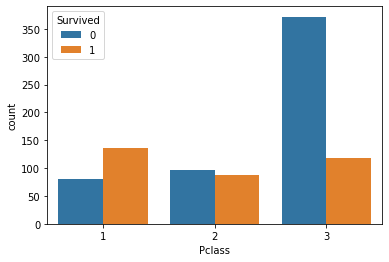

In [8]:
sns.countplot(data=train, x="Pclass", hue="Survived")

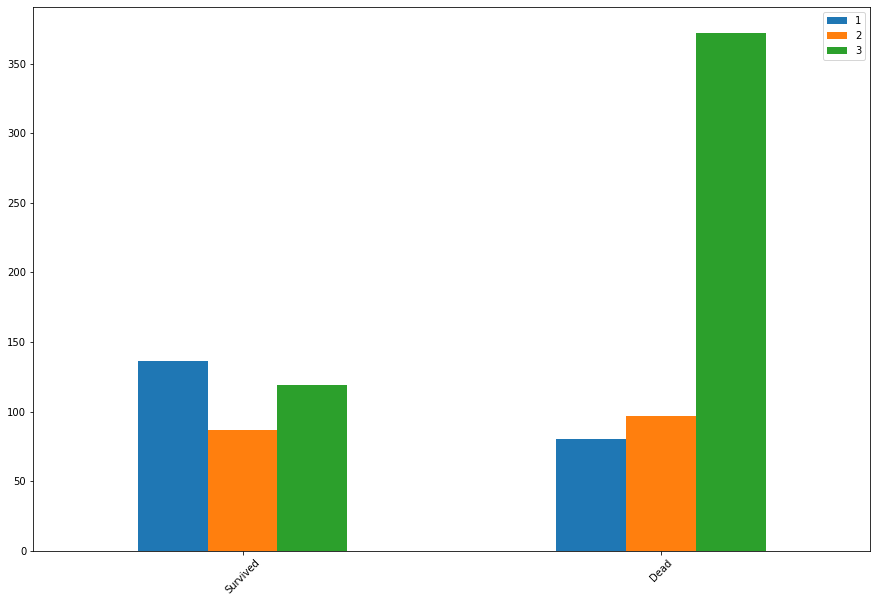

In [9]:
bar_chart("Pclass")

분석 결과 객실 등급(Pclass)이 높을수록 생존 확률이 더 높다는 것을 알 수 있습니다. 조금 더 구체적으로 살펴보자면

* 1등급은 생존자의 인원 수가 사망자의 인원 수보다 더 많지만, 2등급과 3등급은 그렇지 않다.
* 3등급의 경우 생존자의 인원 수보다 사망자의 인원 수가 압도적으로 높다.

이번에는 <u><span style="color:blue">[pivot table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html)</span></u>로 객실 등급(Pclass) 컬럼을 분석해보겠습니다.

In [10]:
pd.pivot_table(train, index="Pclass", values="Survived")

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


분석 결과 객실 등급(Pclass)이 높을수록 생존률이 높다는 사실을 알 수 있었고, 특히나 객실 등급(Pclass)이 2등급인 경우 생존률이 1/2(50%), 3등급인 경우 생존률이 1/4(25%)도 되지 않는다는 사실을 발견할 수 있습니다.<br>


In [11]:
from IPython.display import Image
Image(url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/5095eabce4b06cb305058603/5095eabce4b02d37bef4c24c/1352002236895/100_anniversary_titanic_sinking_by_esai8mellows-d4xbme8.jpg")

In [12]:
Image(url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/t/5090b249e4b047ba54dfd258/1351660113175/TItanic-Survival-Infographic.jpg?format=1500w")


#### Feature - Fare
---

요금이 저렴할수록 사망율이 높다.<br>
( Feature들 사이에 연관성을 정의하자 ) 
* 이 분석은 바로 위에서 결과로 확인했던 Pclass와 연관성이 매우 깊다.
* 3등석 요금이 저렴하기 때문이다.
* Feature요소를 추출하는데 있어서 Fare , Pclass 는 생존율과 사망율에 모두 연결되어진다.

**&gt;&gt;&gt;Fare, Pclass 속성은 모두 지도학습에 사용하게 될 속성으로 추출한다.**

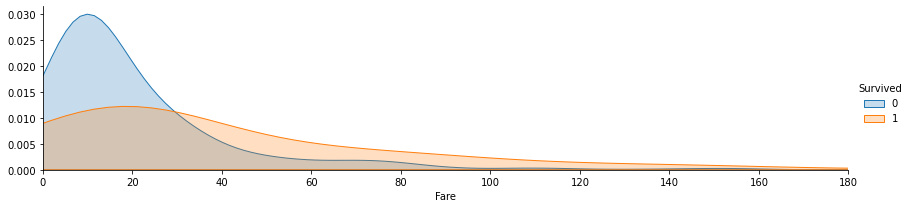

In [13]:
# 데이터의 Visualization 은 데이터 분석에 필수적이다. 
# FacetGrid는 다중 Plot 을 그릴때 많이 사용된다. 즉 여러변수를 한꺼번에 비교할 때 유용하다. (범주!)
# '구획화(Binning)'를 지정할때 유용.

facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0,180)
plt.show()

#### Feature - Sex
---

* 여성일수록 생존률이 높다
* 성별(Sex) 컬럼은 타이타닉 데이터셋에서 가장 중요한 컬럼 중 하나입니다.

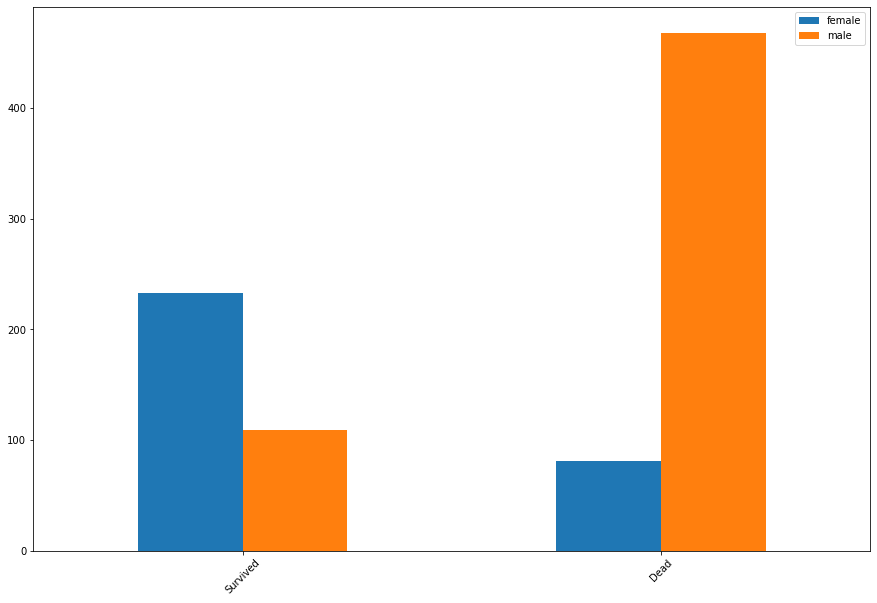

In [14]:
bar_chart('Sex')

분석 결과 여성 승객(female)이 남성 승객(male)에 비해 압도적으로 생존 확률이 높다는 것을 파악할 수 있습니다.

비슷한 결과를 엑셀이나 <span style="color:blue">pandas의 pivot table</span>로 도출해 낼 수 있습니다.

In [15]:
pd.pivot_table(train, index="Sex", values="Survived")

,Survived
Sex,
female,0.742038
male,0.188908


**&gt;&gt;&gt;Sex 속성도 지도학습을 위한 Feature로 추출합니다.**

<span style="color:blue">pivot table</span>로 분석한 결과, 남자 승객의 생존률은, 18.9% 여성 승객의 생존률은 74.2%가 나온다는 것을 알 수 있습니다. 즉, 여성 승객이 남성 승객에 비해 압도적으로 생존 확률이 높다고 판단할 수 있습니다.

같은 분석을 pivot table로도 할 수 있고 데이터 시각화로도 할 수 있다면, 둘 중 어떤 걸 사용하는게 좋을까요? 정답은 **둘 다 병행하는게 좋습니다.** <br>
pivot table과 데이터 시각화 모두 장단점이 있는데,

데이터 시각화는 구체적인 수치(ex: 남성 승객이 생존할 확률은 구체적으로 몇 %인가?)를 알 수는 없지만, 그림으로 보여주기 때문에 굉장히 직관적입니다.
반면 pivot table은 구체적인 수치를 보여주지만(ex: 남성 승객이 생존할 확률은 18.9%이다), 그 수치가 어떠한 의미를 가지는지 직관적으로 알기 어렵습니다. (ex: 그래서 남성에 비해 여성 승객의 생존률은 몇 배 차이가 나는가?)
그러므로 1) 데이터의 전반적인 분포를 알고 싶다면 데이터 시각화를, 2) 통계치 하나하나의 구체적인 수치를 보고 싶다면 pivot_table을 사용하는 것이 좋습니다.

이번에는 데이터 시각화와 pivot table로 다른 컬럼을 분석해보겠습니다.

#### Feature - Age
---

* 나이가 어릴수록 생존률이 높았다.
* 20~30대에서는 오히려 사망률이 더 높게 측정되었다.

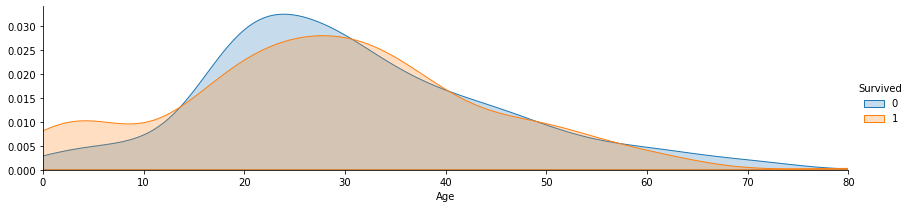

In [16]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
 
plt.show()

__&gt;&gt;&gt;Age 속성도 지도학습을 위한 Feature로 추출합니다.__

#### Feature - Title
---

* 외국사람의 이름에는 항상 Mr, Miss, Mrs 단어가 붙는다.
* 이름만 보고도 그사람의 대강의 나이와 성별 판단이 가능하다.
* 이전 분석결과를 바탕으로 밨을때, Miss일수록 생존확률이 높을 것이고. 반면에 Mr는 사망확률이 높을 것이다.

* Name column을 기술적으로 변경 -> 응용 -> 'Title'
* Encoding 기법이 적용되어야 하는 column | Sex<br>
    Mr : 0 <br>
    Miss : 1 <br>
    Mrs : 2 <br>
    그외 : 3 <br>



In [17]:
train_test_data= [train, test] 
for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Ms : etc --> Ms: Miss
    
title_mapping = {"Mr": "Mr", "Miss": "Miss", "Mrs": "Mrs", 
                 "Master": "etc", "Dr": "etc", "Rev": "etc", "Col": "etc", "Major": "etc", "Mlle": "etc","Countess": "etc",
                 "Ms": "Miss", "Lady": "etc", "Jonkheer": "etc", "Don": "etc", "Dona" : "etc", "Mme": "etc","Capt": "etc","Sir": "etc" }
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

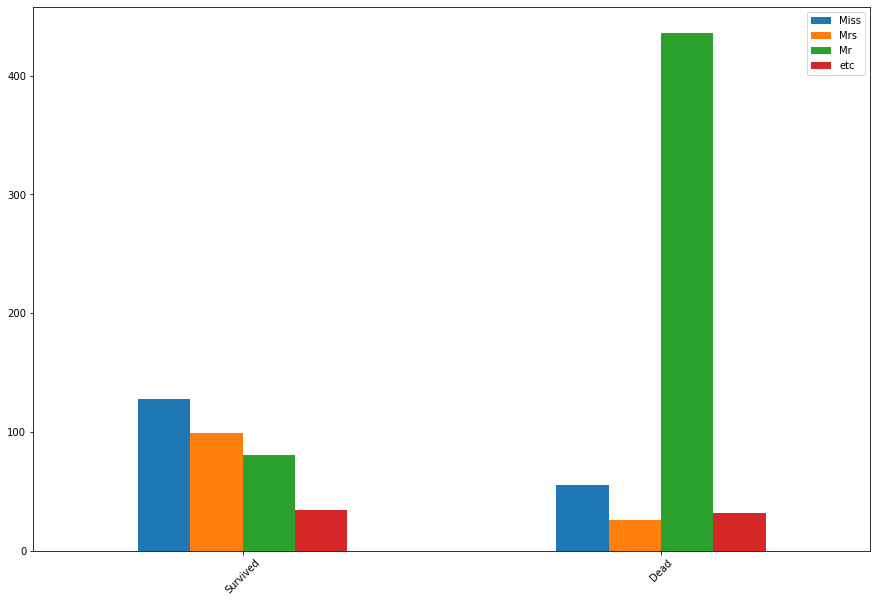

In [18]:
bar_chart('Title')

__&gt;&gt;&gt;Title 속성도 지도학습을 위한 Feature로 추출합니다.__

#### Feature - Family Size
---

* 같이 동반한 가족의 수가 없다면 사명할 확률이 높다.
* 가족이 1명이나 2명일 경우에는 생존자가 미세하지만 조금 더 많이 나온다
* 가족이 3명일때 생존자가 더 많다.


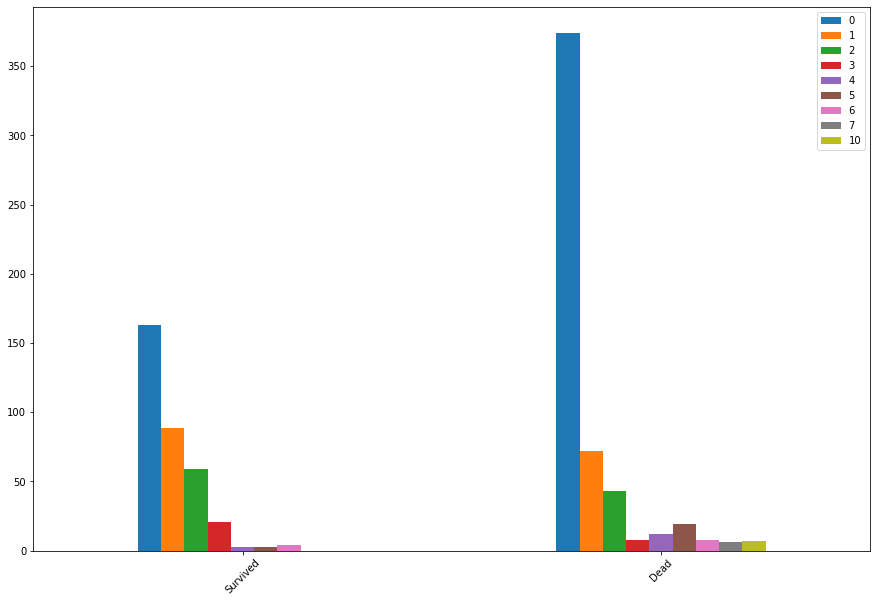

In [19]:
train["FamilySize"] = train["SibSp"] + train["Parch"]
test["FamilySize"] = test["SibSp"] + test["Parch"]
train.drop('SibSp', axis=1, inplace=True)
test.drop('SibSp', axis=1, inplace=True)
train.drop('Parch', axis=1, inplace=True)
test.drop('Parch', axis=1, inplace=True)

bar_chart('FamilySize')

__&gt;&gt;&gt;같이 동반한 가족의 수도 생존 사망과 연관이 있다.
지도학습에 대상으로 동반가족수 Feature도 추출합니다.__

#### Feature - Embarked

* S선착장에서 탑승한 사람일수록 사망률 높다.
* C선착장에서 탐승한 사람일수록 생존률 높다.


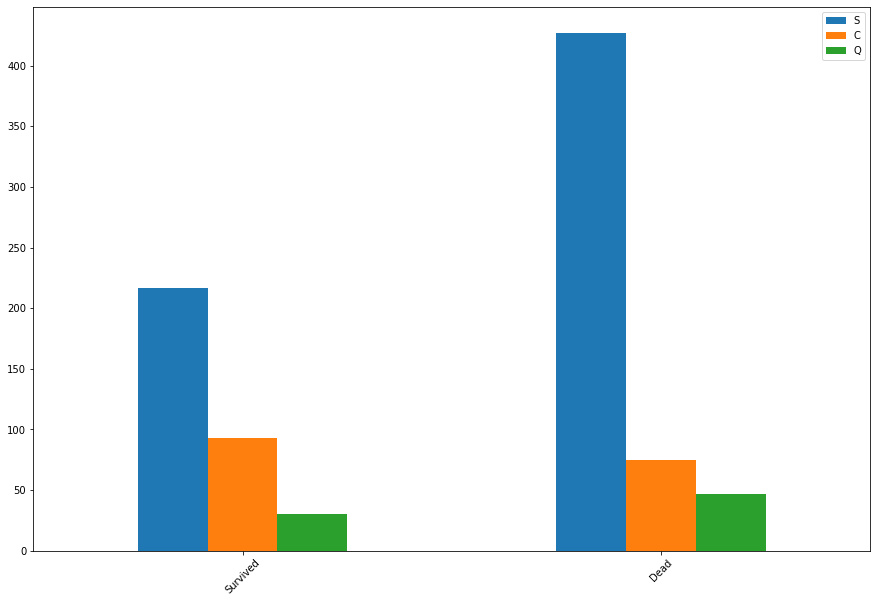

In [20]:
bar_chart('Embarked')

## Cabin
---
뭔가 Cabin 은 연관이 있을 것 같다.

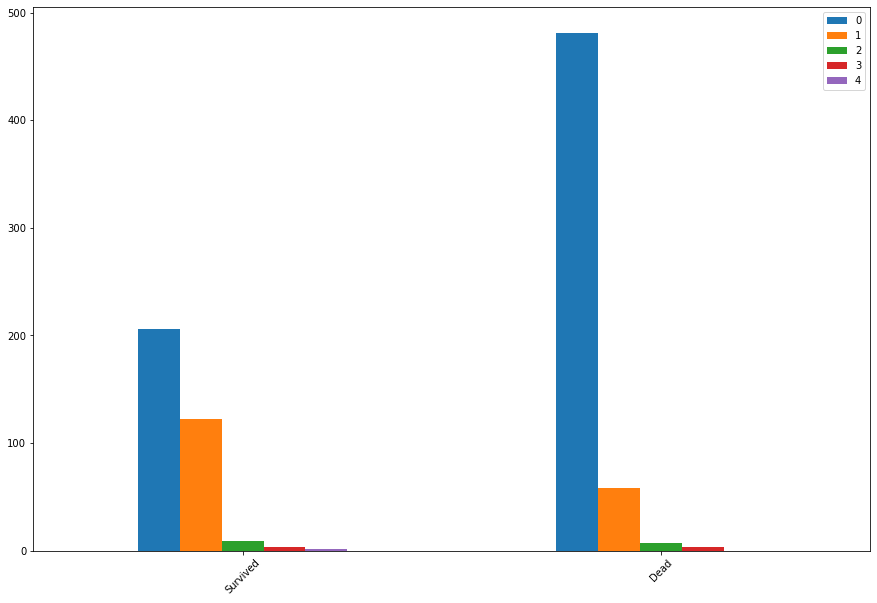

0    327
1     74
2     10
3      4
4      3
Name: Cabin_multiple, dtype: int64

In [21]:
train['Cabin_multiple'] = train.Cabin.apply(lambda x:0 if pd.isna(x) else len(x.split(' ')))
train.Cabin_multiple.value_counts()
bar_chart('Cabin_multiple')

test['Cabin_multiple'] = test.Cabin.apply(lambda x:0 if pd.isna(x) else len(x.split(' ')))
test.Cabin_multiple.value_counts()


---

__&gt;&gt;&gt;Embarked 속성도 지도학습을 위한 Feature로 추출합니다.__

### III. Pre Processing
---
모델을 생성해서 머신러닝(Machine Learning) 알고리즘에 넣기 위해서는(Training 과정), 데이터를 머신러닝 알고리즘이 이해할 수 있는 형태로 변환해줘야 합니다. 이 과정을 전문용어로 전처리(Preprocessing)라고 합니다.

scikit-learn 에서 제공하는 머신러닝 알고리즘에 데이터를 넣을 수 있는 기본 조건은 다음과 같습니다.

1. 불필요한 속성은 과감히 제거한다
2. Fill in Missing Value(데이터에 빈 값이 없어야 한다) - 결측치 값에 대한 전략이 필요함 
3. 모든 데이터는 숫자(정수형, 소수점 등)로 구성되어 있어야 한다.



__타이타닉 데이터에 있는 세 컬럼(Sex, Fare, Embarked)을 전처리해 봅니다.__

#### 1. 관련없는 데이터 속성을 삭제
---

* Ticket
* Cabin
* PassengerId

In [22]:
# Feature Engineering 과정에서 추출되지 않은 

train.drop('Ticket', axis=1, inplace=True)
test.drop('Ticket', axis=1, inplace=True)

train.drop('Cabin', axis=1, inplace=True)
test.drop('Cabin', axis=1, inplace=True)

test_PassengerId=test["PassengerId"]
train.drop('PassengerId', axis = 1, inplace=True)
test.drop('PassengerId', axis = 1, inplace=True)

#### 2. Fill in Missing Value
---

<u><span style="color:blue">scikit-learn</span></u>의 머신러닝 알고리즘에 데이터를 넣을 땐 언제나 데이터에 값이 채워져 있어야 합니다. <br>
만일 데이터에 NaN이라는 값이 있다면 이는 비어있다는 의미이며, <br>
이 데이터를 머신러닝 알고리즘에 넣으면 에러가 발생합니다.

* Age


그룹별로 평균내서 결측값을 채운다.<br>
Mr, Miss, Mrs 그룹 사람들의 나이 평균으로 채운다.

* Fare


그룹별로 평균내서, 결측치 채우기<br>
1등석은 1등석끼리, 2등석은 2등석끼리, 3등석은 3등석끼리 평균내서 채운다


* Embarked

1등석, 2등석, 3등석 모두 각각의 등석별로 표를 구매한 선착장이 'S'가 가장 많았다.<br>
1,2,3 등석 모두가 S선착장에서 구입한 비율이 50%를 넘어섰기 때문에 결측치값은 기본값을 S로 지정했다.(?)

In [23]:
test.head(5)
train.head(5)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,Cabin_multiple
0,0,3,male,22.0,7.2500,S,Mr,1,0
1,1,1,female,38.0,71.2833,C,Mrs,1,1
2,1,3,female,26.0,7.9250,S,Miss,0,0
3,1,1,female,35.0,53.1000,S,Mrs,1,1
4,0,3,male,35.0,8.0500,S,Mr,0,0


In [24]:
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)

In [25]:
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)

<AxesSubplot:>

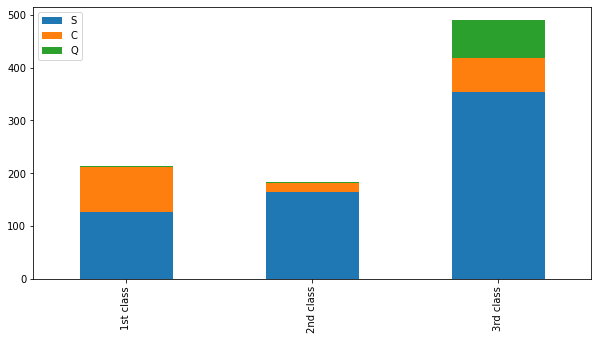

In [26]:
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [27]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

#### 3. 모든 데이터는 숫자(정수형, 소수점 등)로 구성되어 있어야 한다

__3-1. Binning(구간화)__

Binning은 대표적인 Feature Engineering 기법 중의 하나로 숫자형 변수를 범주형 변수로 변형하는 작업이다

승객들을 해당 승객의 나이(숫자)에 따라 총 5구간으로 구분하는 작업(Binning)을 했다.

구간화(Binning)를 이용하면, <br>
(1) 이상치로 발생 가능한 문제를 완화 시켜줄 수 있고,  <br>
(2) 결측치 처리를 보다 간편하게 할 수 있습니다.  <br>
(3) 과적합을 완화 시켜주는 효과가 있고,  <br>
(4) 결과에 대한 해석이 용이하다는 장점도 있습니다. <br>
(5) Target 변수와의 관계가 비선형인 경우도 설명이 가능합니다. <br>


__3-2. Encoding__

성별 컬럼을 전처리하는 가장 쉬운 방법은 male은 0으로, female은 1로 바꿔주는 것입니다. 이를 전문 용어로 인코딩(Encoding)이라고 합니다.<br>
여기서는 Sex, Embarked, Title 컬럼을 숫자로 매핑시켜 줍니다.

#### - Age Binning(구간화)
---

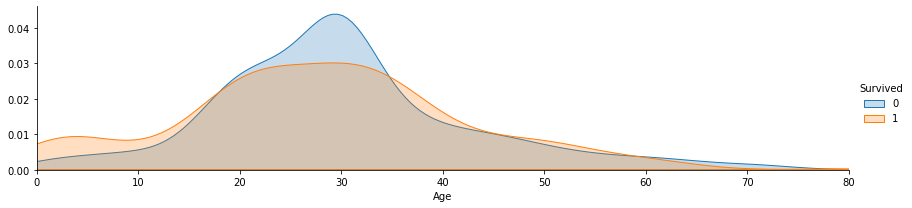

In [28]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
 
plt.show()

In [29]:
# 나이를 구획화 했다.

for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 10, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 10) & (dataset['Age'] <= 22), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 34), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 34) & (dataset['Age'] <= 45), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 45) & (dataset['Age'] <= 62), 'Age'] = 4
    dataset.loc[ dataset['Age'] > 62, 'Age'] = 5

#### - Fare Binning(구간화)

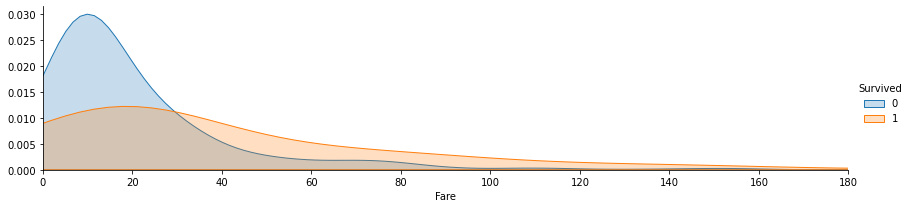

In [30]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0,180)
plt.show()

In [31]:
# 요금도 구획화했다.

for dataset in train_test_data:
    dataset.loc[ dataset['Fare'] <= 17, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 70), 'Fare'] = 2
    dataset.loc[(dataset['Fare'] > 70) & (dataset['Fare'] <= 100), 'Fare'] = 3
    dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 4

#### - Sex Encoding

In [32]:
# 머신에게 학습을 시킬때는 문자열로는 학습이 안된다. 모든 값을 숫자로 매핑시킨다.
sex_mapping = {"male": 0, "female": 1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

#### - Embarked Encoding

In [33]:
# 선착장을 숫자로 맵핑
embarked_mapping = {"S": 0, "C": 1, "Q": 2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

#### - Title Encoding

In [34]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, "etc": 3}
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [35]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,Cabin_multiple
0,0,3,0,1.0,0.0,0,0,1,0
1,1,1,1,3.0,3.0,1,2,1,1
2,1,3,1,2.0,0.0,0,1,0,0
3,1,1,1,3.0,2.0,0,2,1,1
4,0,3,0,3.0,0.0,0,0,0,0


In [36]:
test.head()

,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,Cabin_multiple
0,3,0,3.0,0.0,2,0,0,0
1,3,1,4.0,0.0,0,2,1,0
2,2,0,4.0,0.0,2,0,0,0
3,3,0,2.0,0.0,0,0,0,0
4,3,1,1.0,0.0,0,2,2,0


In [37]:
train_data = train.drop('Survived', axis=1)
train_data

,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,Cabin_multiple
0,3,0,1.0,0.0,0,0,1,0
1,1,1,3.0,3.0,1,2,1,1
2,3,1,2.0,0.0,0,1,0,0
3,1,1,3.0,2.0,0,2,1,1
4,3,0,3.0,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...
886,2,0,2.0,0.0,0,3,0,0
887,1,1,1.0,1.0,0,1,0,1
888,3,1,1.0,1.0,0,1,3,0
889,1,0,2.0,1.0,1,0,0,1


In [38]:
train_label = train['Survived']
train_label

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

### IV. Model Generator
---

이제 전처리(preprocessing)한 데이터를 활용해 Model을 생성해 봅니다.

지도학습(Supervised Learning) 이라고 불리우는 알고리즘은 여러가지가 있습니다.<br>
우리는 지금까지 SVM으로만 모델을 학습시켜 왔는데 다른 모델을 생성해서 사용해 보기로 합니다.<br>
지도학습에는 어떤 모델들이 있는지 먼저 소개부터 한다.<br>

<u><span style="color:blue">[scikit-learn](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html )</span></u> 분류방법 모델 사이트로 들어가서 어떤 것들이 있는지 확인해 보도록 합니다.<br>

여기 보면 각각의 알고리즘들이 어떻게 데이타를 분리하는지 나와있다.
Decision Tree , Random Forest, Ada Boost 등이 있다.
이것들은 우리가 앞으로 다룰 중요한 분류모델들 입니다.

Supervised Learning 알고리즘을 학습시키기 위해서는 두 가지 타입의 데이터가 필요합니다.

Label: 레이블(Label), 내지는 타겟 변수(Target Variable)이라고 부릅니다. (몇몇 곳에서는 Class라고도 부릅니다) 쉽게 말해 우리가 맞춰야 하는 정답입니다. 타이타닉 경진대회에서는 생존 여부(Survived)가 label이 되겠죠.
Feature: 우리가 label을 맞추는데 도움이 되는 값들입니다. 타이타닉 데이터에서는 label을 제외한 대부분의 값들이 Feature가 될 수 있습니다.
우리는 이번 코드에서 다음의 컬럼을 Feature와 Label로 활용할 것입니다.

Feature: 1) 티켓 등급(Pclass), 2) 성별(Sex_encode), 3) 운임요금(Fare_fillin), 그리고 4) 선착장(Embarked)을 사용합니다.
Label: 생존 여부(Survived)를 사용합니다.
이를 통해 train 데이터와 test 데이터를 다음의 세 가지 형태의 값으로 나눌 것입니다.

X_train: train 데이터의 feature 입니다. 줄여서 X_train이라고 부릅니다.
X_test: test 데이터의 feature 입니다. 마찬가지로 줄여서 X_test라고 부릅니다.
y_train: train 데이터의 label 입니다. 마찬가지로 줄여서 y_train이라고 부릅니다.
그리고 아시다시피 y_test 라는 데이터는 존재하지 않을 것입니다. test 데이터에는 생존 여부(Survived)를 나타내는 컬럼이 없기 때문이며, 우리의 목표 자체가 y_test에 해당하는 test 데이터의 생존 여부(Survived)를 예측하는 것이기 때문입니다. 그리고 X_train, y_train, X_test를 활용하여 y_test에 해당하는 값을 예측하는 것이 바로 Decision Tree의 역할입니다.

이제 feature와 label을 정의한 뒤, 이를 활용해 X_train, X_test, y_train을 각각 만들어 보겠습니다.

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
import numpy as np

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

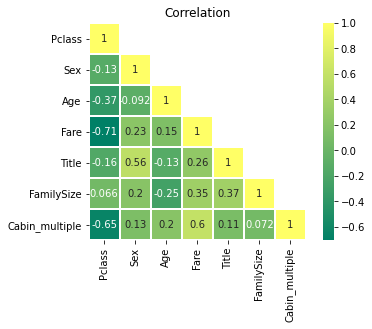

In [40]:
# Corr
corr1 = train[['Pclass','Sex','Age','Fare','Title','FamilySize','Cabin_multiple']]
corr1 = corr1.corr()

mask = np.array(corr1)
mask[np.tril_indices_from(mask)] = False
plt.title("Correlation")
sns.heatmap(corr1,
           annot=True,
           mask=mask,
           cmap='summer',
            linewidths=1.0,
            square=True
           )
plt.show()


In [41]:
# SVM

model = svm.SVC(gamma='auto')
# 얘는 무엇인지 나중에 설명 해주실꺼 . 
score = cross_val_score(model, train_data, train_label, cv= k_fold, n_jobs=1 , scoring='accuracy') # 자동적으로 학습을..해준다?

# Decision Tree
---

In [42]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier

titanic_tree = DecisionTreeClassifier(max_depth = 4, random_state = 10)
titanic_tree.fit(train_data,train_label)


DecisionTreeClassifier(max_depth=4, random_state=10)

In [43]:
pred_tree_result = titanic_tree.predict(test)
np.where(pred_tree_result==" ",",",pred_tree_result)
print("예측결과 : ",pred_tree_result)

예측결과 :  [0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 1 1 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 1 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 1]


<ipython-input-43-7181a4225a15>:2: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  np.where(pred_tree_result==" ",",",pred_tree_result)


In [44]:
submission_tree_result = pd.DataFrame({
    "PassengerId" : test_PassengerId,
    "Survived" : pred_tree_result
    
})

submission_tree_result.to_csv('submission_tree_result.csv', index=False)


In [45]:
submission_tree_result = pd.read_csv('submission_tree_result.csv')
submission_tree_result.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [46]:
!pip install graphviz
import os
os.environ["PATH"]+=os.pathsep+'C:/Program Files/Graphviz/bin/'

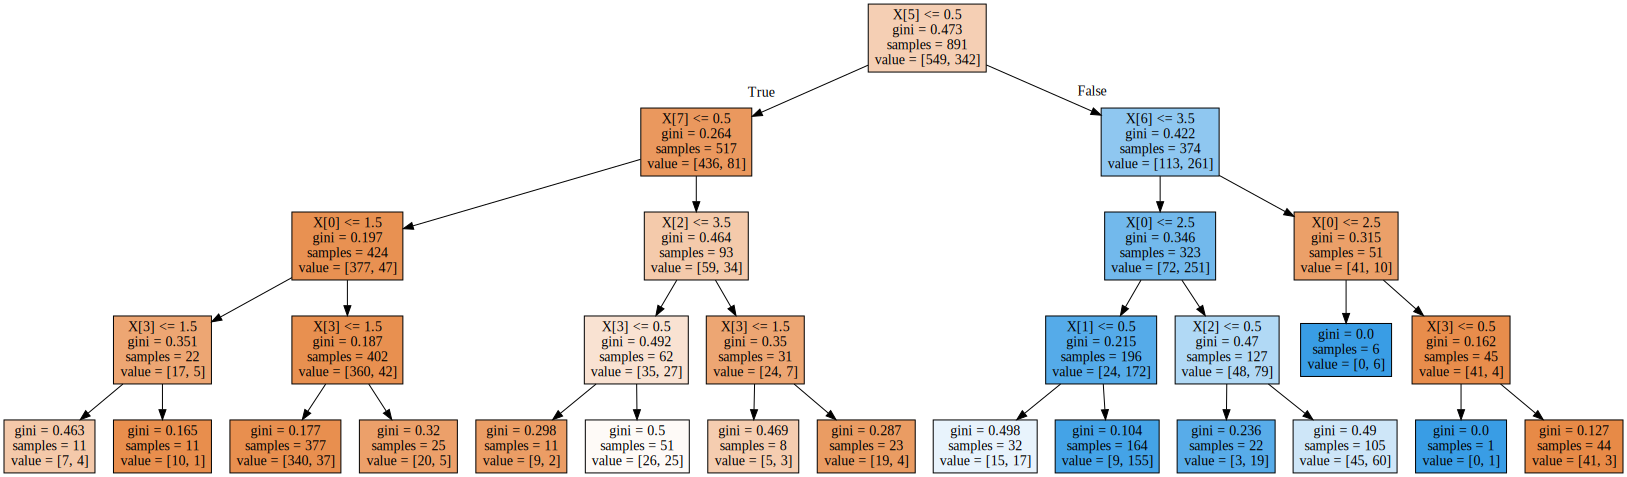

In [47]:
import graphviz 
from sklearn.tree import export_graphviz

export_graphviz(titanic_tree, out_file='titanic_tree.dot',
                filled = True
               )

with open('titanic_tree.dot', encoding='utf-8') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

### V. Accuracy
---

In [48]:
print('SVC : ',round(np.mean(score)*100,2))

SVC :  83.17


### VI. Inference Test Predict
---

In [49]:
# Test data를 통한 예측을 하자
model=svm.SVC(gamma='auto')
model.fit(train_data,train_label)

pred = model.predict(test)
pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

### VII.Kaggle Submit
---

In [50]:
# 예측한 결과를 CSV로 만들어서 Kaggle 측에다 제출해 보겠다.
submission = pd.DataFrame({
    "PassengerId" : test_PassengerId,
    "Survived" : pred
    
})

submission.to_csv('submission3.csv', index=False)



In [51]:
'''
위에서 생성된 submission.csv 파일을 Kaggle 대회측에 제출하자
정답은 알아서 채점해준다. 

'''

submission = pd.read_csv('submission3.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


# =================================

In [55]:
train_data
train_label

,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,Cabin_multiple
0,3,0,3.0,0.0,2,0,0,0
1,3,1,4.0,0.0,0,2,1,0
2,2,0,4.0,0.0,2,0,0,0
3,3,0,2.0,0.0,0,0,0,0
4,3,1,1.0,0.0,0,2,2,0
...,...,...,...,...,...,...,...,...
413,3,0,2.0,0.0,0,0,0,0
414,1,1,3.0,4.0,1,3,0,1
415,3,0,3.0,0.0,0,0,0,0
416,3,0,2.0,0.0,0,0,0,0
